In [33]:
using Gadfly

# Basic Linear Classifier

The linear decision boundary is defined by $\vec{w}\cdot\vec{x}=t$. $\vec{w}$ is a vector perpendicular to the decision boundary, $\vec{x}$ is a vector pointing to an arbitrary point on the decision boundary, and $t$ is the decision threshold. 

Let $P$ be the set of positive examples:

In [17]:
P = reshape([8,10, 9,11, 10,9, 11,10, 12,9, 13,8, 14,11], 2, 7)

2x7 Array{Int64,2}:
  8   9  10  11  12  13  14
 10  11   9  10   9   8  11

In [23]:
P_n = length(P[1,:])

7

And let $N$ be the set of negative examples:

In [16]:
N = reshape([8,5, 9,4, 9,6, 11,3, 11,5, 13,4, 14,2, 15,3], 2, 8)

2x8 Array{Int64,2}:
 8  9  9  11  11  13  14  15
 5  4  6   3   5   4   2   3

In [25]:
N_n = length(N[1,:])

8

The center of the positive examples is defined by $\vec{p} = \frac{1}{n} \sum_{x \in P}\vec{x}$

In [30]:
# calculate the sum of all x components (the first dimension of the vectors of P),
# as well as the sum of all y components (the second dimension of the vectors of P)
# and make a vector out of them. then use the previous definition of p to calculate the
# center of the vectors of P
sumvec_p = [sum(P[1,:]), sum(P[2,:])]
p = (1 / P_n) * sumvec_p

2-element Array{Float64,1}:
 11.0    
  9.71429

The center of the negative examples is equivalently defined:


In [32]:
sumvec_n = [sum(N[1,:]), sum(N[2,:])]
n = (1 / N_n) * sumvec_n

2-element Array{Float64,1}:
 11.25
  4.0 

The different examples are visualised below, where blue is a positive example, and red a negative example.

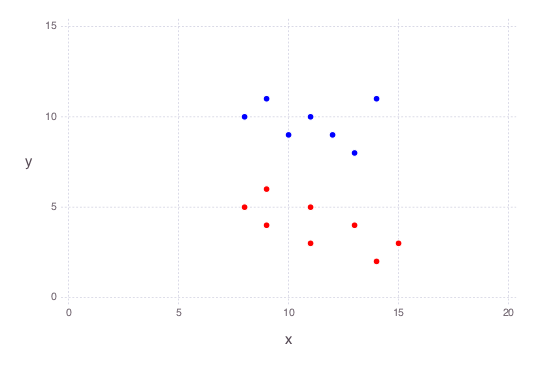

In [44]:
p1 = plot(
    layer(y=N[2,:], x=N[1,:], Geom.point, Theme(default_color=color("red"))),
    layer(y=P[2,:], x=P[1,:], Geom.point, Theme(default_color=color("blue"))),
    Scale.x_continuous(minvalue=0, maxvalue=20)
)

## The Decision Boundary

The decision boundary is located in the mid of the center of the positive examples and the center of the negative examples. We also know that $\frac{\vec{p}+\vec{n}}{2}$ is on the decision boundary, therefore:
$$t = \frac{(\vec{p}-\vec{n})\cdot(\vec{p}+\vec{n})}{2}=\frac{(||\vec{p}||^2-||\vec{n}||^2)}{2}$$

As well as:

$$\vec{w}=\vec{p}-\vec{n}$$

In [45]:
w = p - n

2-element Array{Float64,1}:
 -0.25   
  5.71429